In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [4]:
actual_a=[1 for i in range(10)]+[0 for i in range(10)]
predicted_a=[1 for i in range(9)]+[0,1,1]+[0 for i in range(8)]
print(actual_a)
print(predicted_a)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
def my_confusion_matrix(actual,predicted):
    TP=len([a for a,p in zip(actual,predicted) if a==p and p==1])
    TN=len([a for a,p in zip(actual,predicted) if a==p and p==0])
    FP=len([a for a,p in zip(actual,predicted) if a!=p and p==1])
    FN=len([a for a,p in zip(actual,predicted) if a!=p and p==0])
    return "[[{} {}]\n  [{} {}]]".format(TP,FN,FP,TN)
print(my_confusion_matrix(actual_a,predicted_a))
print(confusion_matrix(actual_a,predicted_a))

[[9 1]
  [2 8]]
[[8 2]
 [1 9]]


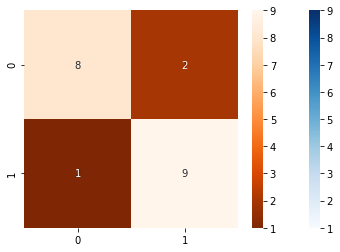

In [6]:
array = [[9,1], 
        [2,8]]
df_cm=pd.DataFrame(array, range(2), range(2))
sns.heatmap(df_cm,annot=True,cmap='Blues')

array = [[8,2], 
        [1,9]]

df_cm=pd.DataFrame(array,range(2),range(2))
sns.heatmap(df_cm,annot=True,cmap="Oranges_r")

In [7]:
def my_accuracy_score(actual,predicted):
    TP=len([a for a,p in zip(actual,predicted) if a==p and p==1])
    TN=len([a for a,p in zip(actual,predicted) if a==p and p==0])
    FP=len([a for a,p in zip(actual,predicted) if a!=p and p==1])
    FN=len([a for a,p in zip(actual,predicted) if a!=p and p==0])
    return (TP+TN)/(TP+TN+FP+FN)
print(my_accuracy_score(actual_a,predicted_a))
print(accuracy_score(actual_a,predicted_a))
    

0.85
0.85


In [8]:
def my_precision_score(actual,predicted):
    TP=len([a for a,p in zip(actual,predicted) if a==p and p==1])
    FP=len([a for a,p in zip(actual,predicted) if a!=p and p==1])
    return TP/(TP+FP)
print(my_precision_score(actual_a,predicted_a))
print(precision_score(actual_a,predicted_a))


0.8181818181818182
0.8181818181818182


In [9]:
def my_recall_score(actual,predicted):
    TP=len([a for a,p in zip(actual,predicted) if a==p and p==1])
    FN=len([a for a,p in zip(actual,predicted) if a!=p and p==0])
    return TP/(TP+FN)
print(my_recall_score(actual_a,predicted_a))
print(recall_score(actual_a,predicted_a))


0.9
0.9


In [13]:
def my_f1_score(actual,predicted):
    x=my_precision_score(actual_a,predicted_a)
    y=my_recall_score(actual_a,predicted_a)
    return (2*x*y)/(x+y)
print(my_f1_score(actual_a,predicted_a))
print(f1_score(actual_a,predicted_a))

0.8571428571428572
0.8571428571428572


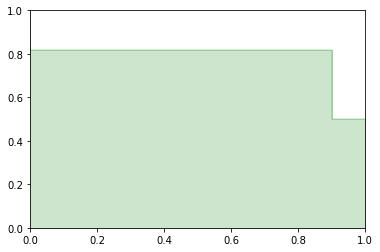

In [17]:
precision,recall,_ =precision_recall_curve(actual_a,predicted_a)
plt.step(recall,precision,color='g',alpha=0.2,where='post')
plt.fill_between(recall,precision,color='g',alpha=0.2,step='post')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()

0.85


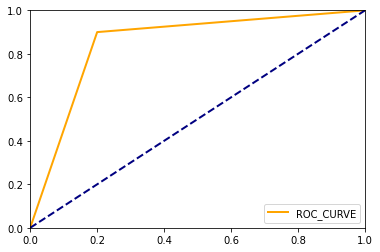

In [25]:
print(roc_auc_score(actual_a,predicted_a))
fpr,tpr,_ =roc_curve(actual_a,predicted_a)
# plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label="ROC_CURVE")
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc="lower right")
plt.show()